In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def plot(file_a, file_b, title):
    # Load data from CSV files
    df_a = pd.read_csv(file_a)
    df_b = pd.read_csv(file_b)
    
    # Task 1: Sort data
    df_a.sort_values(by='name of the test file', inplace=True)
    df_b.sort_values(by='filename', inplace=True)
    
    # Task 2: Extract columns
    solving_time_a = df_a['solving time sat']
    solving_time_b = df_b['solvingTime']
    
    # Task 3: Convert non-numeric values to 180 and convert to float
    solving_time_a = pd.to_numeric(solving_time_a, errors='coerce').fillna(180).astype(float)
    solving_time_b = pd.to_numeric(solving_time_b, errors='coerce').fillna(180).astype(float)
    
    # Set up the figure
    fig, ax = plt.subplots()
    
    # Task 4: Draw a scatter plot with zorder parameter
    sc = ax.scatter(solving_time_a, solving_time_b, zorder=3)
    
    # Task 5: Create x, y labels
    ax.set_xlabel('samples2ltl')
    ax.set_ylabel('AlloyMax')
    
    ax.set_xlim(-5, 185)
    ax.set_ylim(-5, 185)
    # Task 6: Draw a dashed line to the max value of the axis ticks
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'g--', zorder=2, label="y=x")
    ax.plot((-5, 185), (-2.5, 92.5), 'r--', zorder=2, label="y=x/2")
    
    # Task 7: Ensure dots are above the axes and ticks
    ax.set_axisbelow(False)

    ax.set_title(title)
    ax.legend()
    
    # Show the plot
    plt.savefig(f"{title.replace(' ', '_')}.png")
    plt.show()

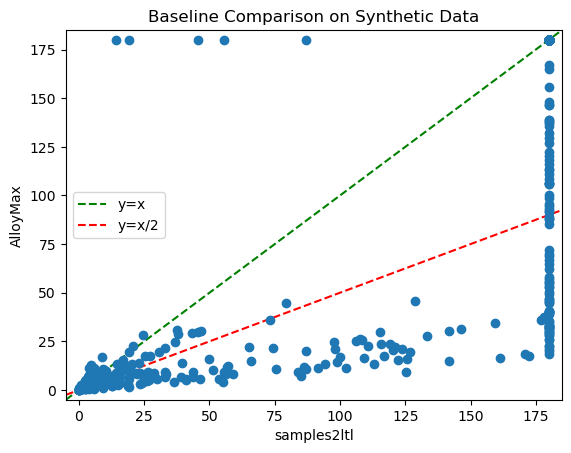

In [40]:
plot('baselines/baseline_stats_all.csv', 'baselines/baseline_alloy_all.csv', 'Baseline Comparison on Synthetic Data')

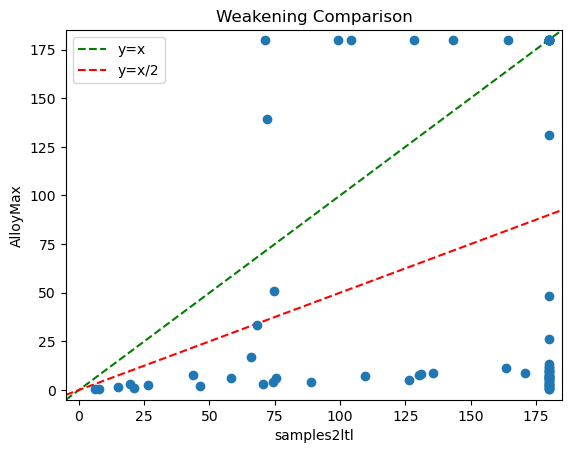

In [41]:
plot('weakening/weakening_stats.csv', 'weakening/weakening_alloy_gr1.csv', 'Weakening Comparison')

In [42]:
def plot_ltl_sketch(a, b, filter_names=None):
    # Read data from A.csv
    df_a = pd.read_csv(a)
    if filter_names is not None:
        df_a = df_a[df_a['filename'].str.contains(filter_names)]
    df_a['solvingTime'] = pd.to_numeric(df_a['solvingTime'], errors='coerce').fillna(180.0)
    df_a = df_a.sort_values(by=['filename', 'type'])
    
    # Read data from B.csv
    df_b = pd.read_csv(b)
    df_b['solvingTime'] = pd.to_numeric(df_b['solvingTime'], errors='coerce').fillna(180.0)
    
    # Create filename_prefix and type columns in B.csv
    df_b['filename_prefix'] = df_b['filename'].str.extract(r'(.*)\.type-[\w\d-]+\.trace')[0]
    df_b['type'] = df_b['filename'].str.extract(r'(type-[\w\d-]+)\.trace')
    
    # Sort B.csv by filename_prefix and type
    if filter_names is not None:
        df_b = df_b[df_b['filename_prefix'].str.contains(filter_names)]
    df_b = df_b.sort_values(by=['filename_prefix', 'type'])
    
    # Function to plot scatter plot and dashed line
    def plot_comparison(df_a, df_b, title):
        plt.scatter(df_a['solvingTime'], df_b['solvingTime'], zorder=3)
        plt.plot([-5, 185], [-5, 185], 'g--', zorder=2, label='y=x')
        plt.plot([-2.5, 92.5], [-5, 185], 'r--', zorder=2, label='y=2x')
        plt.xlim(-5, 185)
        plt.ylim(-5, 185)
        plt.xlabel('LTLSketcher')
        plt.ylabel('AlloyMax')
        plt.title(title)
        plt.legend()
        plt.show()
    
    plot_comparison(df_a, df_b, 'Comparison for all types')
    
    # Plotting for type-0
    df_a_type_0 = df_a[df_a['type'] == 'type-0']
    df_b_type_0 = df_b[df_b['type'] == 'type-0']
    plot_comparison(df_a_type_0, df_b_type_0, 'Comparison for type-0')
    
    # Plotting for type-1-2
    df_a_type_1_2 = df_a[df_a['type'] == 'type-1-2']
    df_b_type_1_2 = df_b[df_b['type'] == 'type-1-2']
    plot_comparison(df_a_type_1_2, df_b_type_1_2, 'Comparison for type-1-2')
    
    # Plotting for type-all
    df_a_type_all = df_a[df_a['type'] == 'type-all']
    df_b_type_all = df_b[df_b['type'] == 'type-all']
    plot_comparison(df_a_type_all, df_b_type_all, 'Comparison for type-all')

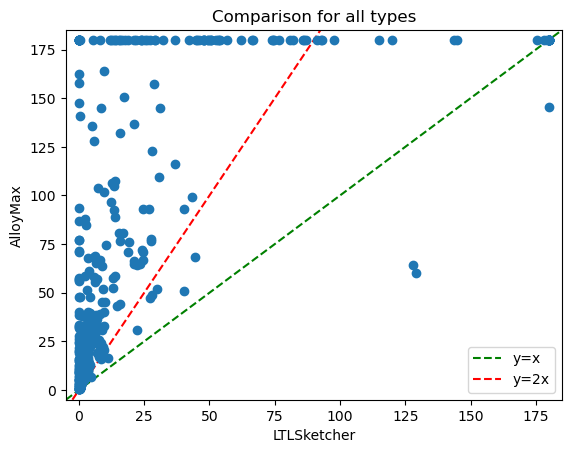

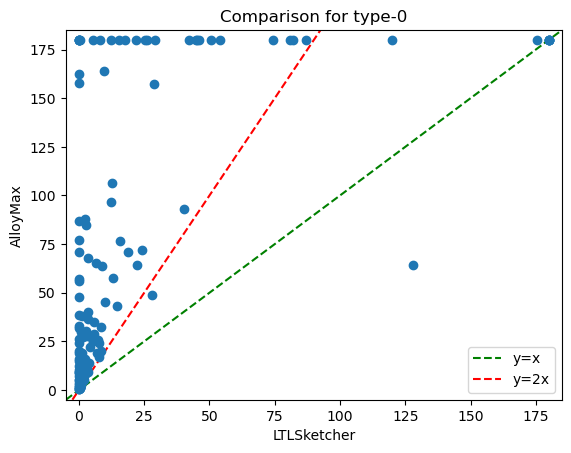

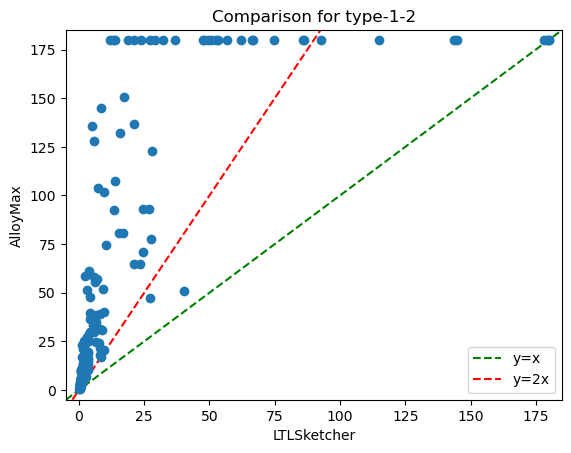

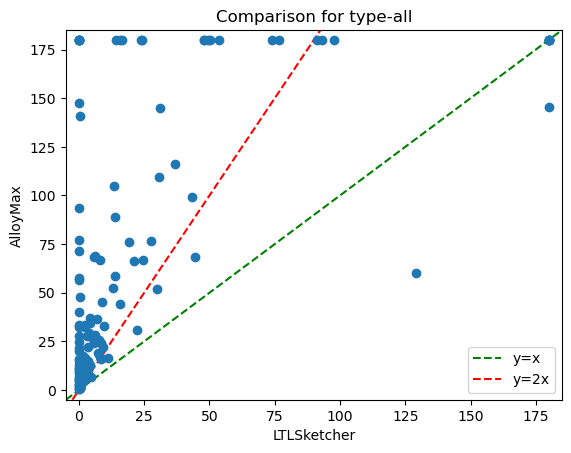

In [43]:
plot_ltl_sketch('ltlsketch/ltlsketch_stats.csv', 'ltlsketch/ltlsketch_alloy.csv')

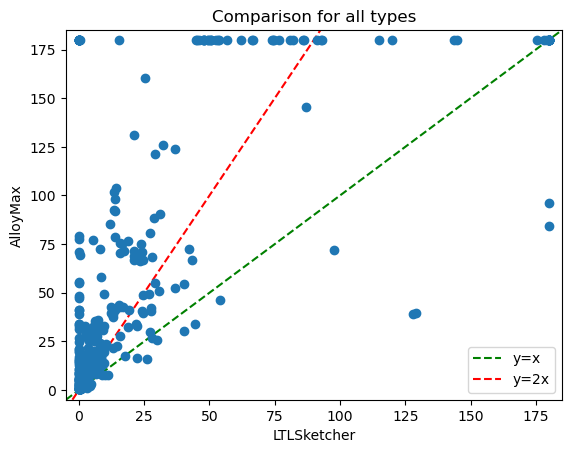

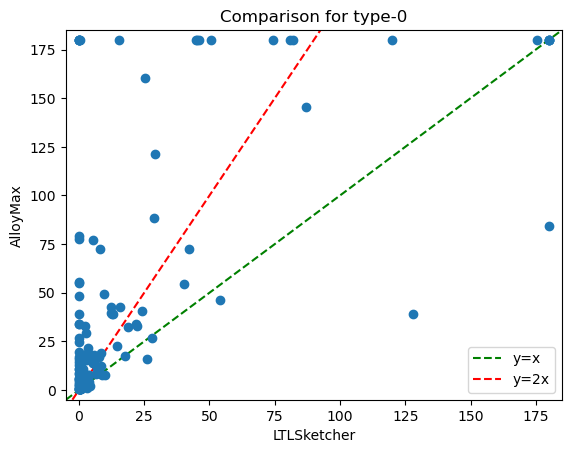

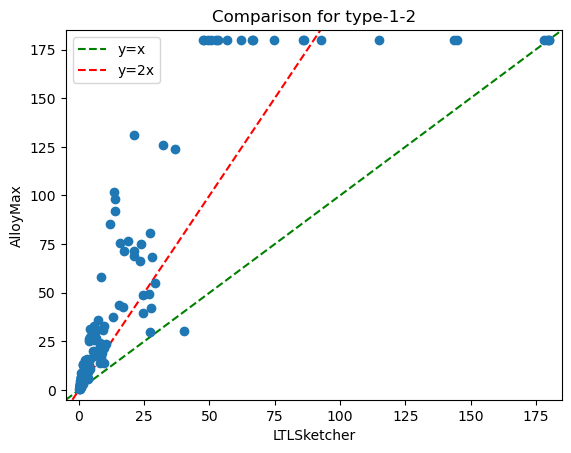

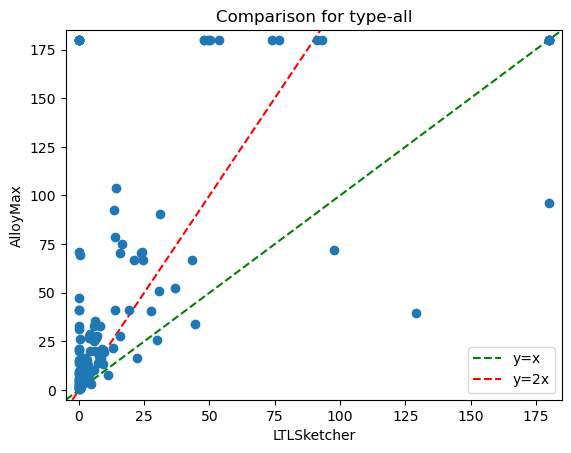

In [45]:
plot_ltl_sketch('ltlsketch/ltlsketch_stats.csv', 'ltlsketch/ltlsketch2_alloy.csv')